## Loan Status Prediction

## Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns 
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
# Model Selection
from sklearn.model_selection import cross_val_score

## Getting Data

In [2]:
# reading data
train_df = pd.read_csv(r'..\data\train.csv')
test_df = pd.read_csv(r'..\data\test.csv')

## Exploring Data

In [3]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
test_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## Visualizing Data

#### Gender

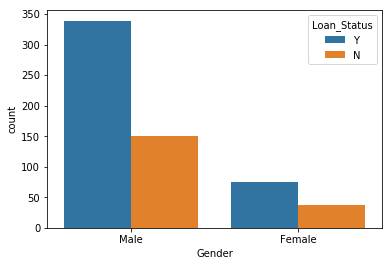

In [1574]:
# Loan_Status-Gender
sns.countplot(x='Gender', hue='Loan_Status', data=train_df)

In [1575]:
train_df[train_df['Gender']=='Male']['Loan_Status'].value_counts(normalize=True)
# train_df[(train_df['Gender']=='Male')&(train_df['Married']=='Yes')]['Loan_Status'].value_counts(normalize=True)
# train_df[(train_df['Gender']=='Male')&(train_df['Married']=='No')]['Loan_Status'].value_counts(normalize=True)

Y    0.693252
N    0.306748
Name: Loan_Status, dtype: float64

In [1576]:
train_df[train_df['Gender']=='Female']['Loan_Status'].value_counts(normalize=True)
# train_df[(train_df['Gender']=='Female')&(train_df['Married']=='Yes')]['Loan_Status'].value_counts(normalize=True)
# train_df[(train_df['Gender']=='Female')&(train_df['Married']=='No')]['Loan_Status'].value_counts(normalize=True)

Y    0.669643
N    0.330357
Name: Loan_Status, dtype: float64

####  Married 

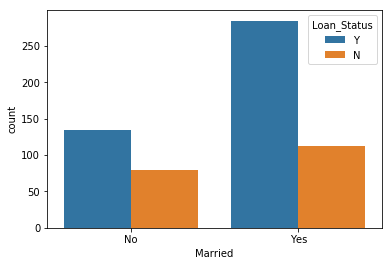

In [1577]:
sns.countplot(x='Married', hue='Loan_Status', data=train_df)

#### Dependents

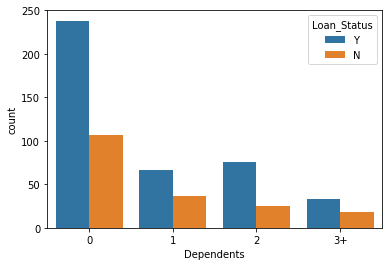

In [1578]:
sns.countplot(x='Dependents', hue='Loan_Status', data=train_df)

#### Education

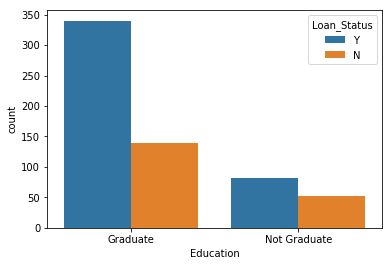

In [1579]:
sns.countplot(x='Education', hue='Loan_Status', data=train_df)

####  Self-Employed

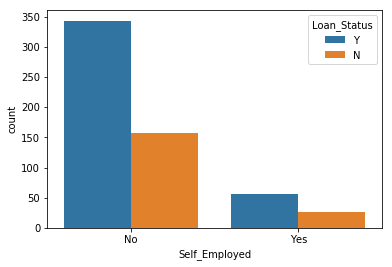

In [1580]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=train_df)

In [1581]:
train_df[train_df['Self_Employed']=='No']['Loan_Status'].value_counts(normalize=True)

Y    0.686
N    0.314
Name: Loan_Status, dtype: float64

#### Property_Area

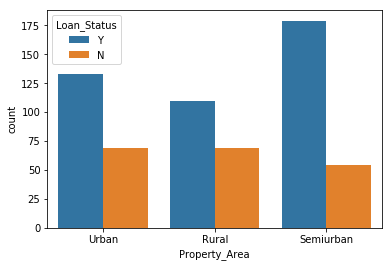

In [1582]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=train_df)

In [1583]:
train_df[train_df['Property_Area']=='Rural']['Loan_Status'].value_counts(normalize=True)

Y    0.614525
N    0.385475
Name: Loan_Status, dtype: float64

#### Credit_History

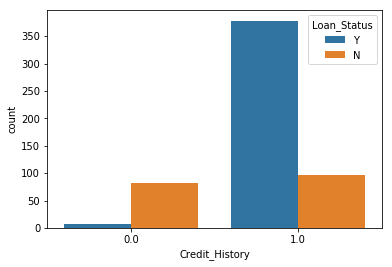

In [1584]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=train_df)

In [1585]:
train_df[train_df['Credit_History']==1.0]['Loan_Status'].value_counts(normalize=True)

Y    0.795789
N    0.204211
Name: Loan_Status, dtype: float64

In [1586]:
train_df[train_df['Credit_History']==0.0]['Loan_Status'].value_counts()

N    82
Y     7
Name: Loan_Status, dtype: int64

In [1587]:
train_df[(train_df['Credit_History']==0.0)&(train_df['Loan_Status']=='Y')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


#### ApplicantIncome

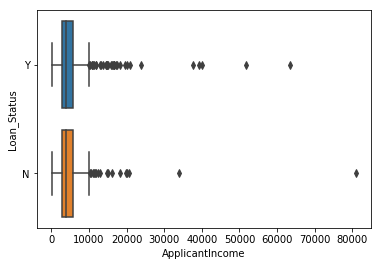

In [1588]:
sns.boxplot( x=train_df["ApplicantIncome"], y=train_df["Loan_Status"] )
#sns.boxplot( x=(train_df["ApplicantIncome"]+train_df["CoapplicantIncome"])/train_df['LoanAmount'], y=train_df["Loan_Status"] )

#### CoapplicantIncome

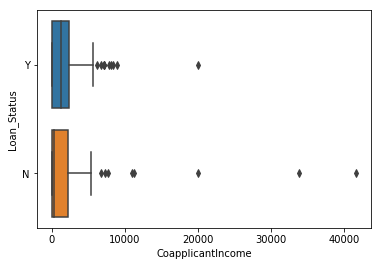

In [1589]:
sns.boxplot( x=train_df["CoapplicantIncome"], y=train_df["Loan_Status"] )

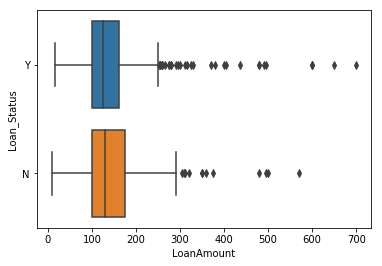

In [1590]:
sns.boxplot( x=train_df["LoanAmount"], y=train_df["Loan_Status"] )

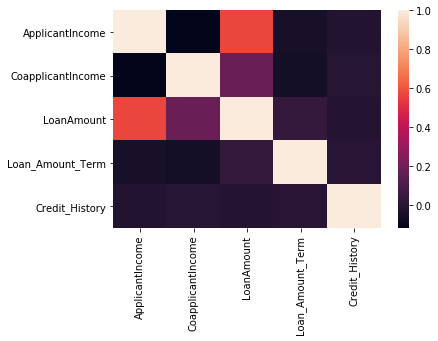

In [1591]:
corr = train_df.corr()
sns.heatmap(corr)

## Missing Values

In [1592]:
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [1593]:
test_df.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

In [1594]:
# Married
train_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [1595]:
pd.crosstab(train_df['Married'], (train_df['CoapplicantIncome']==0))

CoapplicantIncome,False,True
Married,,
No,70,143
Yes,270,128


In [1596]:
# train_df["Married"].fillna(train_df.groupby("Dependents")['Married'].apply(lambda x: x.mode().iloc),inplace =True) ??
train_df.loc[(train_df['Married'].isnull()) & (train_df['CoapplicantIncome']==0), 'Married'] = 'No'
train_df.loc[(train_df['Married'].isnull()), 'Married'] = 'Yes'

test_df.loc[(test_df['Married'].isnull()) & (test_df['CoapplicantIncome']==0), 'Married'] = 'No'
test_df.loc[(test_df['Married'].isnull()), 'Married'] = 'Yes'

In [1597]:
# Gender
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [1598]:
pd.crosstab(train_df['Gender'], (train_df['Married']=='Yes') & (train_df['ApplicantIncome']>train_df['CoapplicantIncome']))

col_0,False,True
Gender,,
Female,86,26
Male,180,309


In [1599]:
train_df.loc[((train_df['Gender'].isnull()) & (train_df['Married']=='Yes') & (train_df['ApplicantIncome']>train_df['CoapplicantIncome']))
, 'Gender'] = 'Male'
train_df.loc[train_df['Gender'].isnull(),'Gender'] = 'Female'

test_df.loc[((test_df['Gender'].isnull()) & (test_df['Married']=='Yes') & (test_df['ApplicantIncome']>test_df['CoapplicantIncome']))
, 'Gender'] = 'Male'
test_df.loc[test_df['Gender'].isnull(),'Gender'] = 'Female'

In [1600]:
# Loan_Amount_Term
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [1601]:
train_df['Loan_Amount_Term'].fillna(360.0,inplace=True)
test_df['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [1602]:
# Dependents
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [1603]:
train_df['Dependents'].fillna('0',inplace = True)
test_df['Dependents'].fillna('0',inplace = True)

In [1604]:
#LoanAmount
train_df[train_df['LoanAmount'].isnull()]['Loan_Status'].value_counts()

N    11
Y    11
Name: Loan_Status, dtype: int64

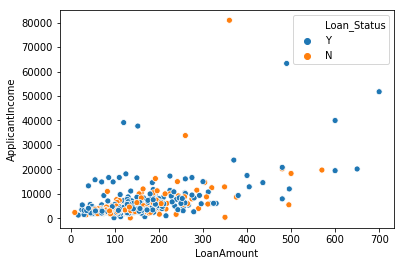

In [1605]:
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', hue='Loan_Status',  data = train_df)

In [1606]:
pd.qcut(train_df['ApplicantIncome'], q=3).value_counts()
# ???? try q=5

(149.999, 3166.0]      207
(4863.333, 81000.0]    205
(3166.0, 4863.333]     202
Name: ApplicantIncome, dtype: int64

In [1607]:
cut_points = [149.999,3166.0,4863.0,81000.0]
label_names = ["Low","Medium","High"]
train_df["ApplicantIncome_Categories"] = pd.cut(train_df["ApplicantIncome"],cut_points,labels=label_names)
test_df["ApplicantIncome_Categories"] = pd.cut(train_df["ApplicantIncome"],cut_points,labels=label_names)

In [1608]:
train_df["ApplicantIncome_Categories"].value_counts()

Low       207
High      205
Medium    202
Name: ApplicantIncome_Categories, dtype: int64

In [1609]:
test_df["ApplicantIncome_Categories"].value_counts()

Medium    129
High      120
Low       118
Name: ApplicantIncome_Categories, dtype: int64

In [1610]:
#train_df["LoanAmount"].fillna(train_df.groupby("ApplicantIncome_Categories")['LoanAmount'].transform('mean'),inplace=True)
#test_df["LoanAmount"].fillna(train_df.groupby("ApplicantIncome_Categories")['LoanAmount'].transform('mean'),inplace=True)
loan_mean = train_df['LoanAmount'].mean()
train_df['LoanAmount'].fillna(loan_mean,inplace=True)
test_df['LoanAmount'].fillna(loan_mean,inplace=True)

In [1611]:
#Self_Employed
train_df[train_df['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Categories
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.000000,360.0,1.0,Urban,Y,Low
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.000000,360.0,1.0,Urban,Y,Low
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.000000,360.0,NaN,Semiurban,N,Medium
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.000000,360.0,1.0,Semiurban,Y,Medium
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.000000,360.0,NaN,Urban,N,Medium
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,146.412162,360.0,NaN,Urban,N,High
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.000000,360.0,1.0,Rural,N,High
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.000000,360.0,1.0,Semiurban,Y,Low
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.000000,360.0,1.0,Semiurban,Y,High
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.000000,360.0,1.0,Rural,Y,Low


In [1612]:
train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [1613]:
train_df['Self_Employed'].fillna('No',inplace =True)
test_df['Self_Employed'].fillna('No',inplace =True)

In [1614]:
# Credit_History
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [1615]:
train_df['Credit_History'].fillna(1.0,inplace =True)
test_df['Credit_History'].fillna(1.0,inplace =True)

In [1616]:
test_df.isnull().any()

Loan_ID                       False
Gender                        False
Married                       False
Dependents                    False
Education                     False
Self_Employed                 False
ApplicantIncome               False
CoapplicantIncome             False
LoanAmount                    False
Loan_Amount_Term              False
Credit_History                False
Property_Area                 False
ApplicantIncome_Categories    False
dtype: bool

In [1617]:
train_df.isnull().any()

Loan_ID                       False
Gender                        False
Married                       False
Dependents                    False
Education                     False
Self_Employed                 False
ApplicantIncome               False
CoapplicantIncome             False
LoanAmount                    False
Loan_Amount_Term              False
Credit_History                False
Property_Area                 False
Loan_Status                   False
ApplicantIncome_Categories    False
dtype: bool

## Outliers

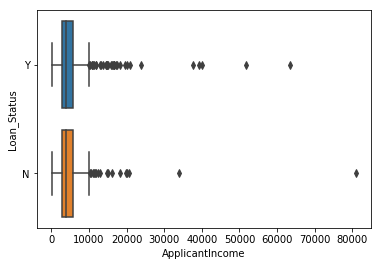

In [1618]:
sns.boxplot( x=train_df["ApplicantIncome"], y=train_df["Loan_Status"] )

In [1619]:
train_df = train_df[train_df['ApplicantIncome'] < 30000]
train_df.shape

(607, 14)

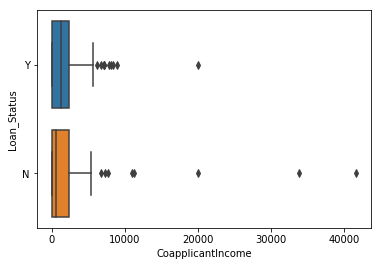

In [1620]:
sns.boxplot( x=train_df["CoapplicantIncome"], y=train_df["Loan_Status"] )

In [1621]:
train_df = train_df[train_df['CoapplicantIncome'] < 10000]
train_df.shape

(601, 14)

## Feature Engineering

#### Converting Data Types

In [1622]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID                       601 non-null object
Gender                        601 non-null object
Married                       601 non-null object
Dependents                    601 non-null object
Education                     601 non-null object
Self_Employed                 601 non-null object
ApplicantIncome               601 non-null int64
CoapplicantIncome             601 non-null float64
LoanAmount                    601 non-null float64
Loan_Amount_Term              601 non-null float64
Credit_History                601 non-null float64
Property_Area                 601 non-null object
Loan_Status                   601 non-null object
ApplicantIncome_Categories    601 non-null category
dtypes: category(1), float64(4), int64(1), object(8)
memory usage: 66.4+ KB


In [1623]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID                       367 non-null object
Gender                        367 non-null object
Married                       367 non-null object
Dependents                    367 non-null object
Education                     367 non-null object
Self_Employed                 367 non-null object
ApplicantIncome               367 non-null int64
CoapplicantIncome             367 non-null int64
LoanAmount                    367 non-null float64
Loan_Amount_Term              367 non-null float64
Credit_History                367 non-null float64
Property_Area                 367 non-null object
ApplicantIncome_Categories    367 non-null category
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 34.9+ KB


In [1624]:
train_df['Dependents']=train_df['Dependents'].astype(str).replace('3+',3).astype(int,inplace=True)
test_df['Dependents']=test_df['Dependents'].astype(str).replace('3+',3).astype(int,inplace=True)

#### Create New Features And Categories

In [1625]:
train_df['TotalIncome']=train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
test_df['TotalIncome']=test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

In [1626]:
train_df['Loan/Income'] = train_df['LoanAmount']/train_df['TotalIncome']
test_df['Loan/Income'] = test_df['LoanAmount']/test_df['TotalIncome']

In [1627]:
train_df['Installment'] = train_df['LoanAmount']/train_df['Loan_Amount_Term']
test_df['Installment'] = test_df['LoanAmount']/test_df['Loan_Amount_Term']

In [1628]:
train_df['RepaymentRatio']=(train_df['Installment']*1000)/train_df['TotalIncome']
test_df['RepaymentRatio']=(test_df['Installment']*1000)/test_df['TotalIncome']

In [1629]:
train_df['FamilySize'] = train_df['Dependents']+1
train_df.loc[(train_df["Married"] == 'Yes'),"FamilySize"] = train_df['FamilySize']+1

test_df['FamilySize'] = test_df['Dependents']+1
test_df.loc[(test_df["Married"] == 'Yes'),"FamilySize"] = test_df['FamilySize']+1

In [1630]:
train_df['per_capita_income'] = train_df['TotalIncome']/train_df['FamilySize']
test_df['per_capita_income'] = test_df['TotalIncome']/test_df['FamilySize']

In [1631]:
#Loan Amount_Categories
pd.qcut(train_df['LoanAmount'], q=4).value_counts()

(8.999, 100.0]    153
(100.0, 128.0]    150
(161.0, 650.0]    149
(128.0, 161.0]    149
Name: LoanAmount, dtype: int64

In [1632]:
pd.qcut(test_df['LoanAmount'], q=4).value_counts()

(101.0, 126.0]     94
(27.999, 101.0]    93
(157.5, 550.0]     92
(126.0, 157.5]     88
Name: LoanAmount, dtype: int64

In [1633]:
cut_points = [8.999,100.25,127.0,169.5,700.0]
label_names = ["Low","Low Medium","High Medium","High"]
train_df["LoanAmount_Categories"] = pd.cut(train_df["LoanAmount"],cut_points,labels=label_names)
test_df["LoanAmount_Categories"] = pd.cut(train_df["LoanAmount"],cut_points,labels=label_names)

In [1634]:
# IsCoapplicantIncome
train_df['IsCoApplicantIncome'] = 1
train_df.loc[(train_df["CoapplicantIncome"] == 0),"IsCoApplicantIncome"] = 0
test_df.loc[(test_df["CoapplicantIncome"] == 0),"IsCoApplicantIncome"] = 0
train_df['IsCoApplicantIncome'].value_counts()

1    334
0    267
Name: IsCoApplicantIncome, dtype: int64

In [1635]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 613
Data columns (total 22 columns):
Loan_ID                       601 non-null object
Gender                        601 non-null object
Married                       601 non-null object
Dependents                    601 non-null int32
Education                     601 non-null object
Self_Employed                 601 non-null object
ApplicantIncome               601 non-null int64
CoapplicantIncome             601 non-null float64
LoanAmount                    601 non-null float64
Loan_Amount_Term              601 non-null float64
Credit_History                601 non-null float64
Property_Area                 601 non-null object
Loan_Status                   601 non-null object
ApplicantIncome_Categories    601 non-null category
TotalIncome                   601 non-null float64
Loan/Income                   601 non-null float64
Installment                   601 non-null float64
RepaymentRatio                601 non-

#### Create Dummies

In [1636]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop([column_name], axis=1)
    return df

In [1637]:
dummies_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Credit_History','ApplicantIncome_Categories','LoanAmount_Categories']
#'LoanAmount_Categories'
for col in dummies_columns:
    train_df = create_dummies(train_df,col)
    test_df = create_dummies(test_df,col)

In [1638]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 613
Data columns (total 34 columns):
Loan_ID                              601 non-null object
Dependents                           601 non-null int32
ApplicantIncome                      601 non-null int64
CoapplicantIncome                    601 non-null float64
LoanAmount                           601 non-null float64
Loan_Amount_Term                     601 non-null float64
Loan_Status                          601 non-null object
TotalIncome                          601 non-null float64
Loan/Income                          601 non-null float64
Installment                          601 non-null float64
RepaymentRatio                       601 non-null float64
FamilySize                           601 non-null int32
per_capita_income                    601 non-null float64
IsCoApplicantIncome                  601 non-null int64
Gender_Female                        601 non-null uint8
Gender_Male                          

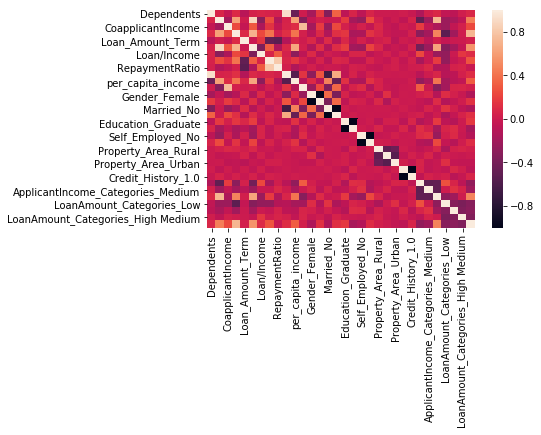

In [1639]:
corr= train_df.corr()
sns.heatmap(corr)

#### Feature Scaling

In [1640]:
from sklearn.preprocessing import minmax_scale
columns = ["ApplicantIncome",'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan/Income','Installment','TotalIncome']

In [1641]:
for col in columns:
    train_df[col] = minmax_scale(train_df[col])
    test_df[col] = minmax_scale(test_df[col])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


#### Feature Selecting

In [1642]:
train_df.columns

Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Loan_Status', 'TotalIncome',
       'Loan/Income', 'Installment', 'RepaymentRatio', 'FamilySize',
       'per_capita_income', 'IsCoApplicantIncome', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0',
       'ApplicantIncome_Categories_Low', 'ApplicantIncome_Categories_Medium',
       'ApplicantIncome_Categories_High', 'LoanAmount_Categories_Low',
       'LoanAmount_Categories_Low Medium', 'LoanAmount_Categories_High Medium',
       'LoanAmount_Categories_High'],
      dtype='object')

In [1643]:
train_df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,TotalIncome,Loan/Income,Installment,...,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0,ApplicantIncome_Categories_Low,ApplicantIncome_Categories_Medium,ApplicantIncome_Categories_High,LoanAmount_Categories_Low,LoanAmount_Categories_Low Medium,LoanAmount_Categories_High Medium,LoanAmount_Categories_High
0,LP001002,0,0.240942,0.000000,0.214372,0.74359,Y,0.169123,0.276250,0.041377,...,1,0,1,0,0,1,0,0,1,0
1,LP001003,1,0.187418,0.167929,0.185647,0.74359,N,0.178410,0.225841,0.035833,...,0,0,1,0,1,0,0,0,1,0
2,LP001005,0,0.120492,0.000000,0.088924,0.74359,Y,0.059790,0.238205,0.017164,...,1,0,1,1,0,0,1,0,0,0
3,LP001006,0,0.102862,0.262584,0.173167,0.74359,Y,0.134277,0.266896,0.033424,...,1,0,1,1,0,0,0,1,0,0
4,LP001008,0,0.247326,0.000000,0.205928,0.74359,Y,0.174917,0.257027,0.039747,...,1,0,1,0,0,1,0,0,1,0


In [1644]:
from sklearn.feature_selection import RFECV

def select_features(df):
    # Remove non-numeric columns, columns that have null values
    #df = df.select_dtypes([np.number]).dropna(axis=1)
    y_train = df["Loan_Status"]
    X_train = df.drop(['Loan_Status','Loan_ID'],axis=1)
    
    clf = RandomForestClassifier(random_state=1,n_estimators=9)
    selector = RFECV(clf,cv=10)
    selector.fit(X_train, y_train)
    
    clf.fit(X_train, y_train)
    
    features = pd.DataFrame()
    features['Feature'] = X_train.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    features.plot(kind='bar', figsize=(20, 10))
    
    
    best_columns = list(X_train.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

Best Columns 
------------
['ApplicantIncome', 'TotalIncome', 'Loan/Income', 'RepaymentRatio', 'per_capita_income', 'Credit_History_0.0', 'Credit_History_1.0']



['ApplicantIncome',
 'TotalIncome',
 'Loan/Income',
 'RepaymentRatio',
 'per_capita_income',
 'Credit_History_0.0',
 'Credit_History_1.0']

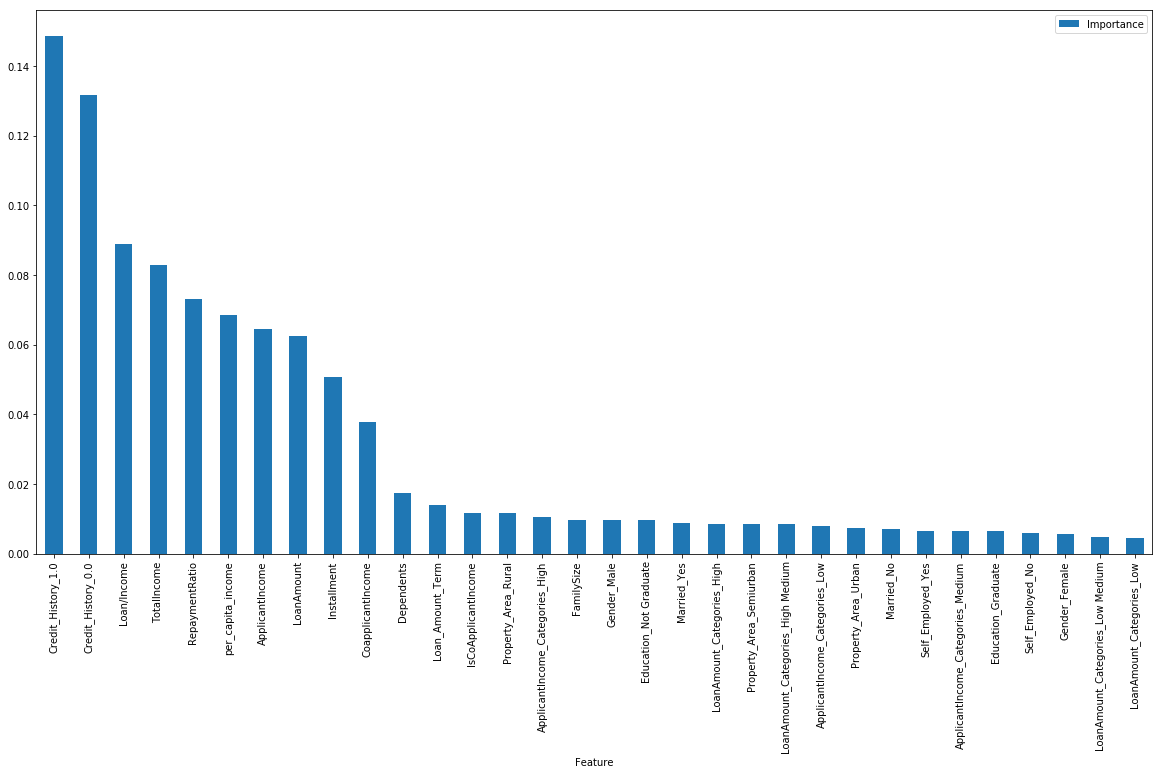

In [1645]:
select_features(train_df)

Best Columns 
------------
['ApplicantIncome', 'TotalIncome', 'Loan/Income', 'RepaymentRatio', 'per_capita_income', 'Credit_History_0.0', 'Credit_History_1.0']



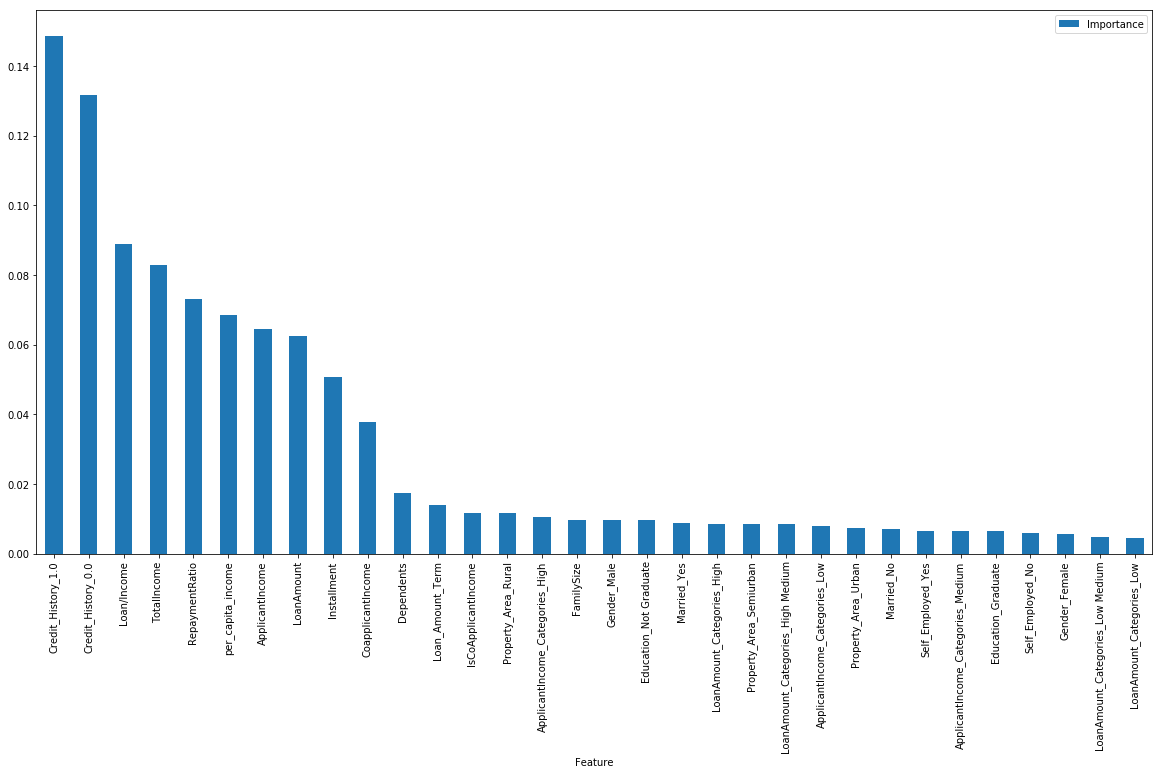

In [1646]:
features = select_features(train_df)

In [1647]:
my_features = ['ApplicantIncome', 'TotalIncome', 'Loan/Income', 'RepaymentRatio', 
               'per_capita_income', 'Credit_History_1.0','Installment','CoapplicantIncome', 'LoanAmount']


## Modelling

In [1648]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df,features):
    
    X_train = df[features]
    y_train = df["Loan_Status"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        },  
        {
            "name": "SVC",
            "estimator": SVC(),
            "hyperparameters":
                {   'C': [0.1, 1, 10, 100, 1000],  
                    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                    'kernel': ['rbf']
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(X_train, y_train)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

In [1649]:
result = select_model(train_df, my_features)

LogisticRegression
------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.8136439267886856
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.6672212978369384
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.8219633943427621
Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 4}

SVC
---
Best Score: 0.6921797004991681
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Making a Submission

In [1651]:
def save_submission_file(model,cols,filename="submission.csv"):
    holdout_data = test_df[cols]
    predictions = model.predict(holdout_data)
    
    holdout_ids = test_df["Loan_ID"]
    submission_df = {"Loan_ID": holdout_ids,
                 "Loan_Status": predictions}
    submission = pd.DataFrame(submission_df)

    submission.to_csv(filename,index=False)
    #return submission

In [1652]:
result[2]["best_model"]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [1653]:
best_rf_model = result[2]["best_model"]
save_submission_file(best_rf_model,my_features)

In [1654]:
# first score 0.78
# 0.7777